# `**Titanic Dataset Summary**:`

The Titanic dataset is a collection of data about passengers who were on board the RMS Titanic, which famously sank in 1912. It includes various attributes related to each passenger, such as their:

**Passenger Clas**s (Pclass): Class of the ticket (1st, 2nd, or 3rd).

**Name**: The passenger's name.

**Age**: Age of the passenger.

**Sex**: Gender (male or female).

**SibSp**: Number of siblings or spouses aboard.

**Parch**: Number of parents or children aboard.

**Ticket**: Ticket number.

**Fare**: The amount paid for the ticket.

**Cabin**: The cabin number.

**Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**Survived**: Whether the passenger survived (1 = Yes, 0 = No).


**Use for Analysis**:
The Titanic dataset is primarily used for predictive modeling, classification, and survival analysis. It's often employed in data science to:

**Predict survival chances**: By analyzing various factors (age, sex, class, etc.), data scientists try to predict whether a passenger would survive the disaster.

**Understand patterns**: Examine which factors (like age, gender, class) had the most influence on survival rates.

**Test machine learning models**: This dataset is commonly used for training and evaluating classification models (e.g., logistic regression, decision trees, random forests) for binary outcomes.

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [456]:
from PIL import Image
img = Image.open("/content/Titanic Pic.png")
img.show()

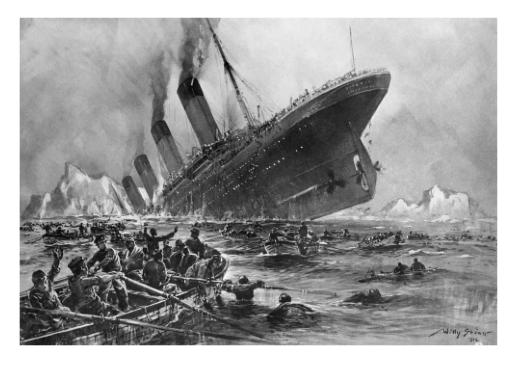

In [457]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [458]:
#For Loading Data-set
df=pd.read_excel('/content/train.xlsx')

In [459]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [460]:
df.shape

(891, 12)

# Basic Understanding (Exploratory Analysis)

In [461]:
# Total number of passengers in dataset
total_passengers = df.shape[0]
print("Total passengers:", total_passengers)

Total passengers: 891


In [462]:
#How meny survived
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [463]:
# Calculate overall survival rate
survival_rate = (df['Survived'].sum() / len(df)) * 100
print(survival_rate)

38.38383838383838


survival means many of people survived..

In [464]:
# Compare survival rate by gender
print(df.groupby('Sex')['Survived'].mean() * 100)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


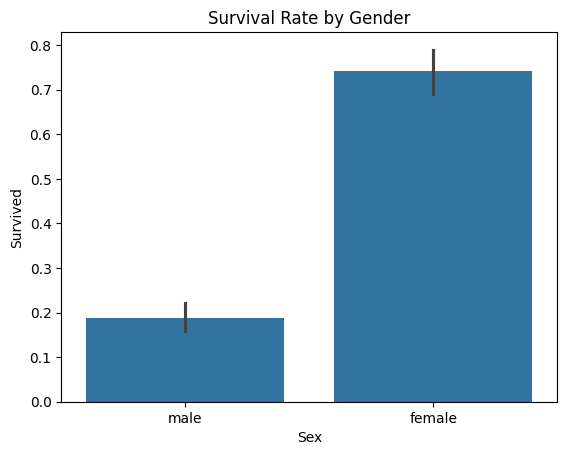

In [465]:
# Visualization
sns.barplot(x='Sex', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate by Gender")
plt.show()

In [466]:
# Compare survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean() * 100)


Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


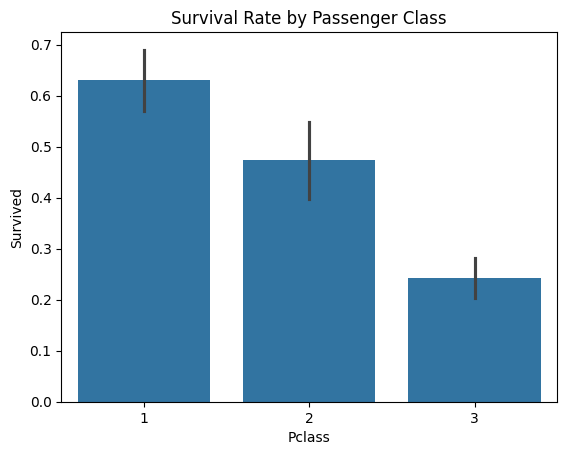

In [467]:
# Visualization
sns.barplot(x='Pclass', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [468]:
# Create a new column to mark children (Age < 18)
df['AgeGroup'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')

# Compare survival rate by AgeGroup
print(df.groupby('AgeGroup')['Survived'].mean() * 100)

AgeGroup
Adult    36.118252
Child    53.982301
Name: Survived, dtype: float64


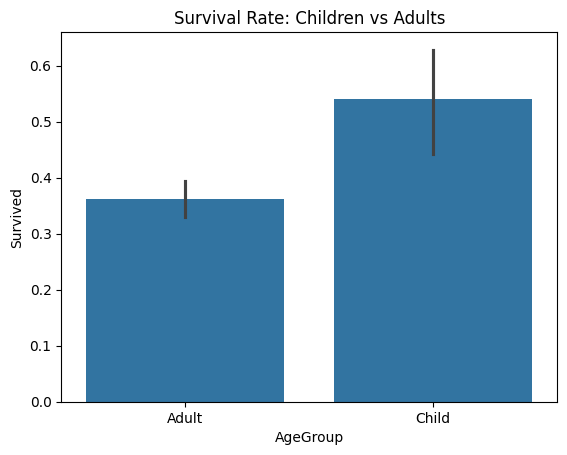

In [469]:
# Visualization
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate: Children vs Adults")
plt.show()

# Demographic Analysis

In [470]:
# Create custom age groups: 0–18 (Child), 19–35 (Young), 36–50 (Adult), 50+ (Senior)
def age_group(age):
    if age <= 18:
        return '0-18 (Child)'
    elif age <= 35:
        return '19-35 (Young Adult)'
    elif age <= 50:
        return '36-50 (Adult)'
    else:
        return '50+ (Senior)'

df['AgeGroup'] = df['Age'].apply(age_group)

In [471]:
# Calculate survival rate in each age group
print("\nSurvival rate by Age Group:")
print(df.groupby('AgeGroup')['Survived'].mean() * 100)


Survival rate by Age Group:
AgeGroup
0-18 (Child)           50.359712
19-35 (Young Adult)    38.268156
36-50 (Adult)          39.869281
50+ (Senior)           30.705394
Name: Survived, dtype: float64


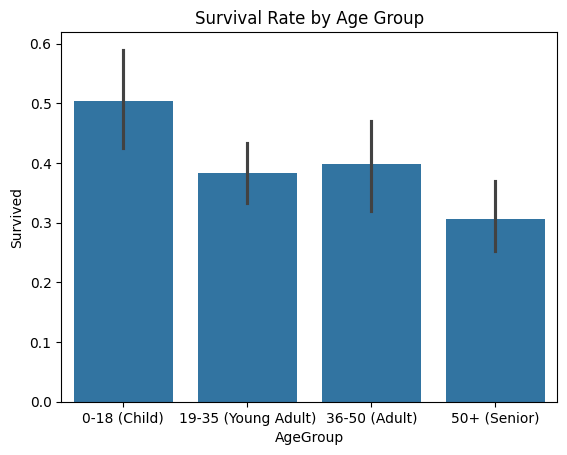

In [472]:
# Visualize it
sns.barplot(x='AgeGroup', y='Survived', data=df, estimator=np.mean, order=['0-18 (Child)','19-35 (Young Adult)','36-50 (Adult)','50+ (Senior)'])
plt.title("Survival Rate by Age Group")
plt.show()

In [473]:
#Relation between Fare (ticket price) and Survival
print(df.groupby('Survived')['Fare'].mean())

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64


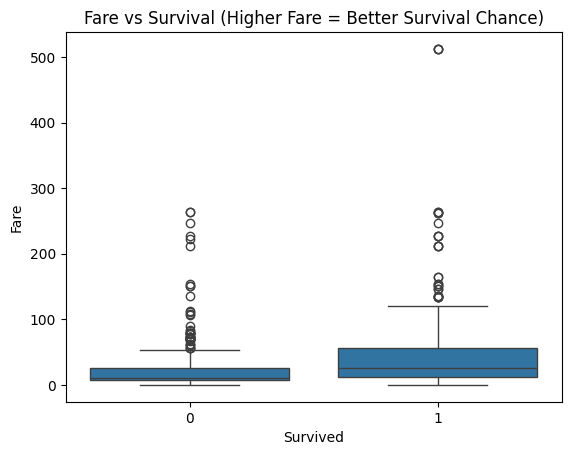

In [474]:
# Visualize Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival (Higher Fare = Better Survival Chance)")
plt.show()

**Insight**: Higher-fare passengers (1st class) usually had better cabins and easier access to lifeboats → higher survival.

In [475]:
#Survival by Embarkation Port
print(df.groupby('Embarked')['Survived'].mean() * 100)

Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


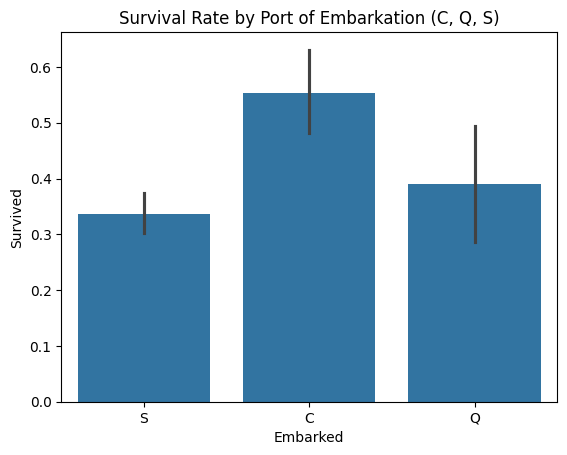

In [476]:
# Visualize
sns.barplot(x='Embarked', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate by Port of Embarkation (C, Q, S)")
plt.show()

**Insight**: Usually Cherbourg (C) passengers show higher survival (mostly 1st-class).

In [477]:
# Family Members (SibSp + Parch) and Survival
# Create a new feature: total family members aboard
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger

In [478]:
# Check survival rate by family size
print(df.groupby('FamilySize')['Survived'].mean() * 100)


FamilySize
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: Survived, dtype: float64


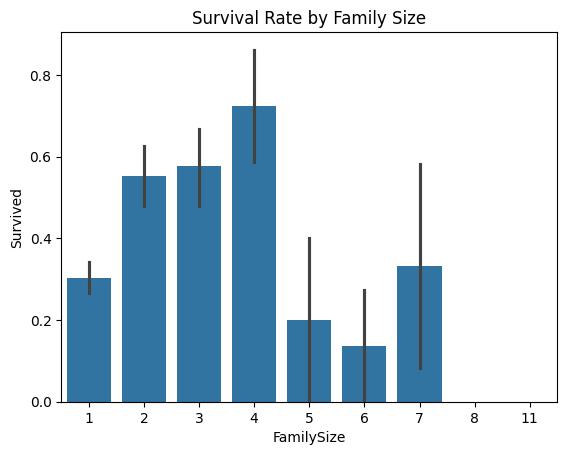

In [479]:
# Visualize
sns.barplot(x='FamilySize', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate by Family Size")
plt.show()

**Insight**:
Small families2,4 members had better survival chances.
Single or very large families usually had lower survival.

# **Summary**
In this step, we studied how gender and passenger class together affected survival chances. The results showed that female passengers had a much higher survival rate than males. This happened because of the “women and children first” rescue rule followed during the disaster.

When we compared this with passenger classes, it became clear that 1st-class females had the highest survival rate, while 3rd-class males had the lowest. People in higher classes had better access to lifeboats and cabins near the deck, which increased their chances of survival.

Overall, the combination of being female and travelling in 1st or 2nd class gave the best chance of survival, while 3rd-class males were the most affected group.

#**Now we look at the deeper insights of this data-set**.

In [480]:
# Compare survival rate by Gender and Class
print(df.groupby(['Pclass', 'Sex'])['Survived'].mean() * 100)

Pclass  Sex   
1       female    96.808511
        male      36.885246
2       female    92.105263
        male      15.740741
3       female    50.000000
        male      13.544669
Name: Survived, dtype: float64


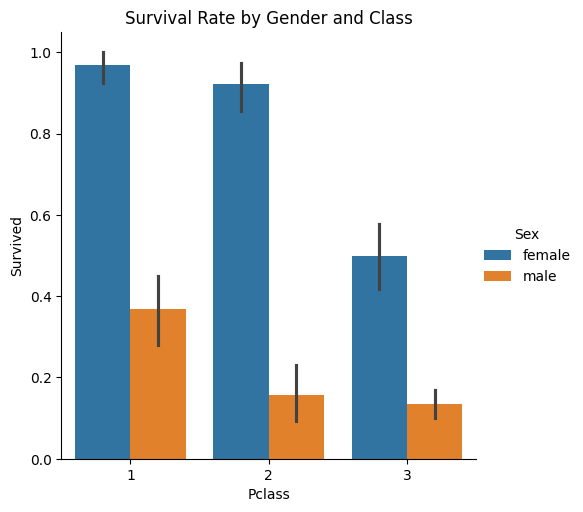

In [481]:
# Visualize it
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title("Survival Rate by Gender and Class")
plt.show()

**Simple Summary**:
In every class (1st, 2nd, 3rd), females survived more than males.
Especially, 1st-class females had the highest survival rate, while 3rd-class males had the lowest.

In [482]:
# Compare survival by Fare using bins
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])
print(df.groupby('FareGroup')['Survived'].mean() * 100)

FareGroup
Low          19.730942
Medium       30.357143
High         45.495495
Very High    58.108108
Name: Survived, dtype: float64


/tmp/ipython-input-3571093728.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('FareGroup')['Survived'].mean() * 100)


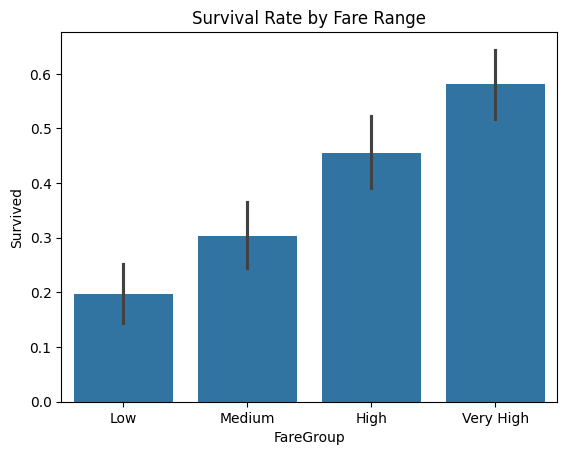

In [483]:
# Visualization
sns.barplot(x='FareGroup', y='Survived', data=df, estimator=np.mean)
plt.title("Survival Rate by Fare Range")
plt.show()

**Summary**:
Passengers who paid higher fares survived more often.
This means richer passengers (mostly in 1st class) had better survival chances because of their location and quick lifeboat access.

In [484]:
# Create a column to mark if traveling alone
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Alone'] = df['FamilySize'].apply(lambda x: 'Alone' if x == 1 else 'With Family')


In [485]:
# Compare survival rate
print(df.groupby('Alone')['Survived'].mean() * 100)

Alone
Alone          30.353818
With Family    50.564972
Name: Survived, dtype: float64


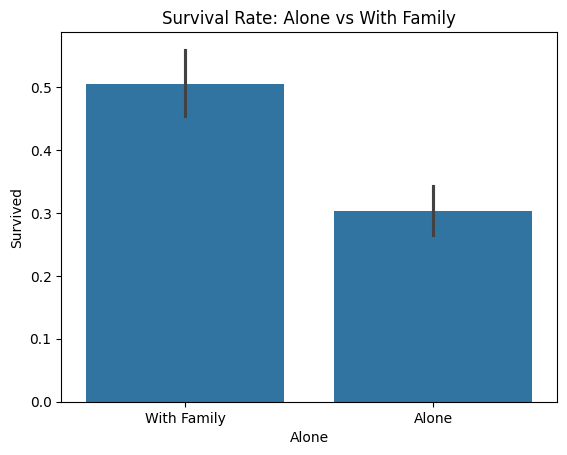

In [486]:
# Visualization
sns.barplot(x='Alone', y='Survived', data=df)
plt.title("Survival Rate: Alone vs With Family")
plt.show()

**Summary**:
Passengers who were with family had better survival chances.
Those who were traveling alone mostly died because no one was there to help or guide them during rescue.

In [487]:
# But we can see survival patterns where data exists.
df['CabinSection'] = df['Cabin'].astype(str).str[0]  # Take first letter (A, B, C..)
print(df.groupby('CabinSection')['Survived'].mean() * 100)

CabinSection
A    46.666667
B    74.468085
C    59.322034
D    75.757576
E    75.000000
F    61.538462
G    50.000000
T     0.000000
n    29.985444
Name: Survived, dtype: float64


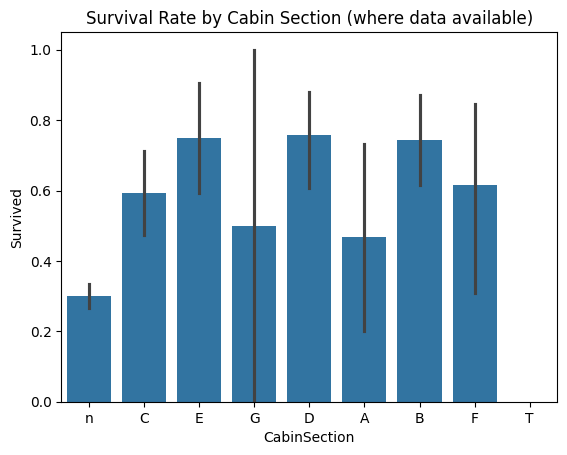

In [488]:
# Visualization
sns.barplot(x='CabinSection', y='Survived', data=df)
plt.title("Survival Rate by Cabin Section (where data available)")
plt.show()

**Summary**:
Passengers in Cabin A, B, and C (upper decks) had higher survival chances.
Cabins closer to the lower decks had fewer survivors since they were far from lifeboats.

In [489]:
# Titanic dataset usually contains only passengers (not crew),
# but if any crew data appears, we can identify them using Title.
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')
print(df['Title'].value_counts())

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3380860793.py:3: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.')


**Summary**:
The dataset mostly contains passengers only, not crew members.
Titles like Mr., Mrs., Miss, Master confirm that these were passengers, not ship staff.

# Summry
This step gave us deeper insights about who had a higher chance of survival.
We found that females survived more than males in every class, and higher-fare passengers had better chances.
People traveling with family survived more than those traveling alone.
Also, Cabin sections on upper decks showed more survivors because they were close to the lifeboats.
Finally, the dataset mainly includes passengers, not crew members.

As we know that survival rate is not bad so so i am keen intrested to know  that name who peoples are survived..

In [490]:
# Filter passengers who survived
survived_passengers = df[df['Survived'] == 1]

# Show their names and key info
survived_passengers[['Name', 'Age', 'Sex', 'Pclass', 'Fare']].head(20)

,Name,Age,Sex,Pclass,Fare
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female,1,71.2833
2,"Heikkinen, Miss. Laina",26.0,female,3,7.9250
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female,1,53.1000
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,female,3,11.1333
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,female,2,30.0708
10,"Sandstrom, Miss. Marguerite Rut",4.0,female,3,16.7000
11,"Bonnell, Miss. Elizabeth",58.0,female,1,26.5500
15,"Hewlett, Mrs. (Mary D Kingcome)",55.0,female,2,16.0000
17,"Williams, Mr. Charles Eugene",NaN,male,2,13.0000
19,"Masselmani, Mrs. Fatima",NaN,female,3,7.2250


In [491]:
#This code giving me a ticket numbers that have more than one passenger.
family_groups = df.groupby('Ticket')['Name'].count().reset_index()
family_groups = family_groups[family_groups['Name'] > 1]
print(family_groups)

               Ticket  Name
2                1601     7
10               2627     2
19               2651     2
20               2653     2
21               2659     2
..                ...   ...
634     SC/Paris 2123     3
668  STON/O2. 3101279     2
675        W./C. 6607     2
676        W./C. 6608     4
680         WE/P 5735     2

[134 rows x 2 columns]


In [492]:
df[(df['Name'].str.contains("Laroche"))][['Name', 'Age', 'Sex', 'SibSp', 'Parch', 'Survived']]

,Name,Age,Sex,SibSp,Parch,Survived
43,"Laroche, Miss. Simonne Marie Anne Andree",3.0,female,1,2,1
608,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",22.0,female,1,2,1
685,"Laroche, Mr. Joseph Philippe Lemercier",25.0,male,1,2,0


we see family with three passengers once a father name is Mr. Joseph Laroche not servived but his wife Mrs. Juliette Laroche and her doughter Miss Simonne Laroch servived..


**Logics**
In the Titanic dataset, each passenger’s Name column follows the format “Surname, Title. Firstname”, where the surname represents family identity.
By filtering records that contain the same surname — for example, "Laroche" — we can identify all passengers belonging to the same family.
This approach is justified because families usually traveled under a shared ticket number and show similar values in SibSp (siblings/spouse) and Parch (parents/children)** columns.

In our analysis, filtering by "Laroche" revealed exactly three passengers — Mr. Joseph Laroche, Mrs. Juliette Laroche, and Miss Simonne Laroche — who represent a single family unit, confirmed by their shared surname, ticket number, and family relationship pattern.

#**Data Cleaning & Feature Engineering**

In [493]:
df.shape

(891, 18)

so now we see we create more column more for our analysis and this is will be done

**Missing Values Handling**

In [494]:
# Missing values count
missing = df.isnull().sum()

#  Percentage of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100

# 3Combine both in one table
#missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage (%)': missing_percent})

#  Show only columns having missing values
missing_data = missing_data[missing_data['Missing Values'] > 0]
print(missing_data)

          Missing Values  Percentage (%)
Age                  177       19.865320
Cabin                687       77.104377
Embarked               2        0.224467


The "Age" column is a numeric one and is usually skewed.
 Best practice: Fill missing values with the median, because outliers have less impact on the median.

In [495]:
# Median se imputation
#df['Age'].fillna(df['Age'].median(), inplace=True)

When i run this code,the warning occurs because the inplace=True method is used, which modifies a copy of the DataFrame rather than the original one. In future versions of Pandas (version 3.0), this behavior will change, and inplace=True may not work as expected. To avoid this issue and ensure your code is compatible with future versions, it is recommended to assign the result back to the original DataFrame directly instead of using inplace=True.

In [496]:
#so we use fillna method for this
df['Age'] = df['Age'].fillna(df['Age'].median())

As we seein "Cabin" have  77% missing values so we remave this columns

In [497]:
# Drop the "Cabin" column
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [498]:
# Mode se fill bcz "Embarked" have just 2 misiing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [499]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [500]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize',
       'FareGroup', 'Alone', 'CabinSection', 'Title'],
      dtype='object')

In [501]:
# Missing rows count
missing_rows = df[df.isnull().any(axis=1)]
print("Rows with missing values:", len(missing_rows))

Rows with missing values: 0


**Check Duplicates values**

In [502]:
# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


**Outlier Detection & Handling**

**Common Methods to Detect Outliers**:

**Boxplot Method** : Points outside the whiskers are outliers.
(Rule: Values beyond upper or lower whiskers → Outliers). this is used just seeing the outlia not for remove

**Z-Score Method** : If Z-score > 3 or < -3, it is an outlier.
(Rule: |Z| > 3 → Outlier)

**IQR Method** : Values outside (Q1 - 1.5×IQR) or (Q3 + 1.5×IQR).
(Rule: < Q1 - 1.5×IQR or > Q3 + 1.5×IQR → Outlier)

In [503]:
# Select only numeric columns (integers and floats)
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = {}  # Create a dictionary to store outlier counts for each column

In [504]:
# Loop through each numeric column
for col in num_cols:
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1                 # IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR        # Lower bound
    upper = Q3 + 1.5 * IQR        # Upper bound

    # Now count the Outliers
    outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = outlier_count  #Store in  Dictionary

In [505]:
print(outlier_counts)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 66, 'SibSp': 46, 'Parch': 213, 'Fare': 116, 'FamilySize': 91}


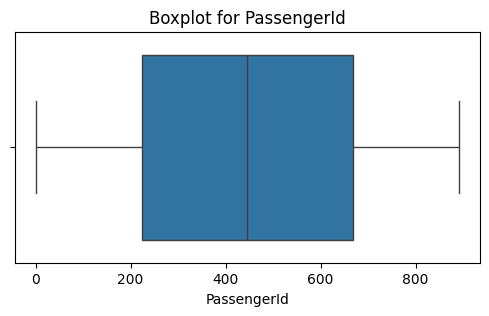

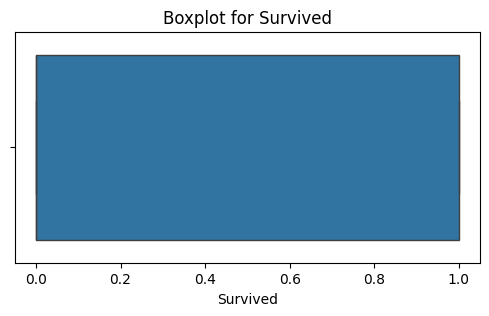

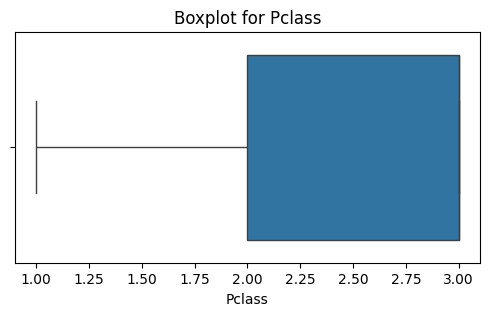

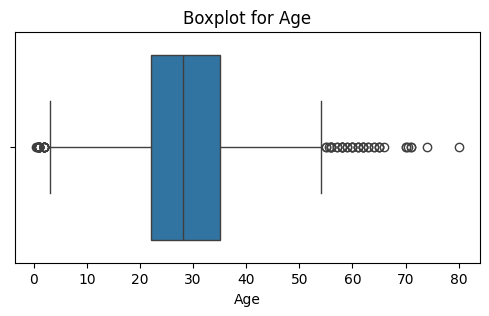

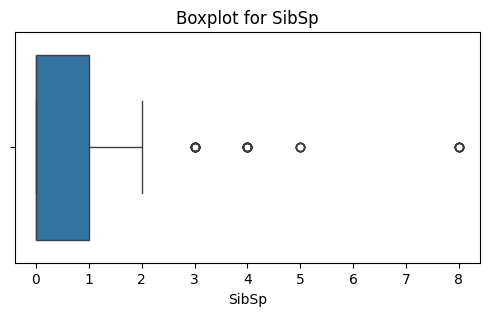

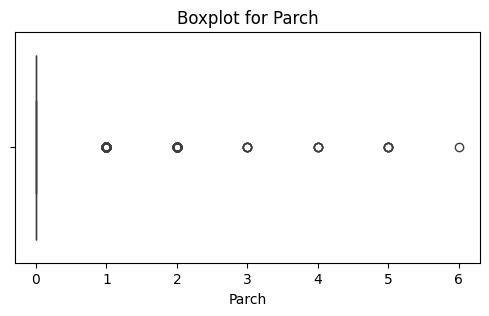

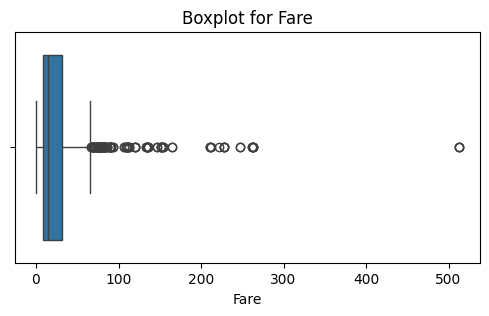

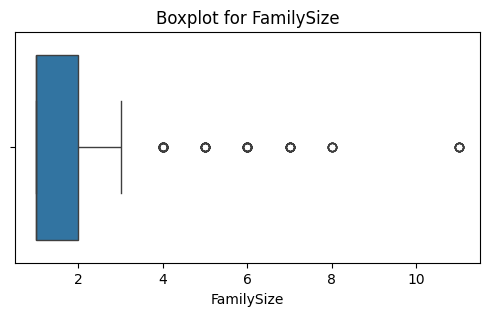

In [506]:
#Now we visualize the Outliar in all column
# Loop to plot boxplot for each numeric column
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**IQR** looks at the middle 50% of the data and considers values outside this range as outliers.
**Z-Score** checks how far a value is from the mean in terms of standard deviations.

 IQR is more robust for skewed or uneven data, while Z-Score works best for data that is almost normally distributed.

**We use IQR**
In this Titanic dataset, numeric columns like "Age" and "Fare" are skewed with some very small and very large values. That’s why IQR is more suitable here, as it handles skewed data better and is less affected by extreme values.

**Skewed Data**:it means Data is not balanced; most values are on one side, with a long tail on the other side.

**Remove outliers using IQR**

In [507]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)   # 25th percentile
        Q3 = data[col].quantile(0.75)   # 75th percentile
        IQR = Q3 - Q1                    # Interquartile Range (IQR)
        lower = Q1 - 1.5 * IQR           # Lower bound
        upper = Q3 + 1.5 * IQR           # Upper bound

        # Keep only values within lower and upper bound
        data = data[(data[col] >= lower) & (data[col] <= upper)]
    return data

In [508]:
# Apply the function to remove outliers from all numeric columns
df_clean = remove_outliers_iqr(df, num_cols)

In [509]:
# Show the shape before and after removing outliers
print("Before removing outliers:", df.shape)
print("After removing outliers:", df_clean.shape)

Before removing outliers: (891, 17)
After removing outliers: (465, 17)


After Removing Outlier we see Rows mininze 891 to 465 but columns are the same

Now i **Remove Outliar in my text type data** of  my dataset

In [510]:
import re # Python module for working with regular expressions (used for pattern matching in text)

In [511]:
#so first again i chek column name
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize',
       'FareGroup', 'Alone', 'CabinSection', 'Title'],
      dtype='object')

In [512]:
# Text/categorical columns identify
text_cols = ['Name', 'Sex', 'Ticket', 'Embarked']

In [513]:
#Threshold: minimum number of occurrences to not be considered rare
# Using absolute count instead of % to handle unique values
threshold_name = 10     # Titles appearing less than 10 times will be rare
threshold_ticket = 10   # Ticket prefixes appearing less than 10 times will be rare
threshold_embarked = 10 # Embarked values appearing less than 10 times will be rare


In [514]:
# --- 1. Name: Extract title ---
def extract_title(name):
    match = re.search(r', (\w+)\.', name)
    if match:
        return match.group(1)
    else:
        return 'Other'

df['Title'] = df['Name'].apply(extract_title)

In [515]:
# Detect rare titles
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < threshold_name].index.tolist()
print("Rare titles:", rare_titles)

# Replace rare titles with 'Other'
df['Title'] = df['Title'].apply(lambda x: 'Other' if x in rare_titles else x)


Rare titles: ['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Ms', 'Mme', 'Don', 'Lady', 'Sir', 'Capt', 'Other', 'Jonkheer']


In [516]:
# --- 2. Ticket: Extract prefix ---
def ticket_prefix(ticket):
    match = re.match(r'([A-Za-z./]+)', str(ticket))
    if match:
        return match.group(1).strip()
    else:
        return 'None'

df['TicketPrefix'] = df['Ticket'].apply(ticket_prefix)

In [517]:
# Detect rare ticket prefixes
ticket_counts = df['TicketPrefix'].value_counts()
rare_tickets = ticket_counts[ticket_counts < threshold_ticket].index.tolist()
print("Rare ticket prefixes:", rare_tickets)


Rare ticket prefixes: ['W./C.', 'SOTON/O.Q.', 'CA.', 'SOTON/OQ', 'CA', 'C', 'SC/PARIS', 'F.C.C.', 'S.O.C.', 'SC/Paris', 'LINE', 'S.O./P.P.', 'PP', 'SC/AH', 'A./', 'A.', 'WE/P', 'S.C./PARIS', 'SOTON/O', 'P/PP', 'Fa', 'A', 'S.O.P.', 'S.P.', 'S.C./A.', 'SO/C', 'W.E.P.', 'SC', 'SCO/W', 'W/C', 'SW/PP', 'S.W./PP', 'A/S', 'F.C.', 'C.A./SOTON']


In [518]:
# Replace rare ticket prefixes with 'Other'
df['TicketPrefix'] = df['TicketPrefix'].apply(lambda x: 'Other' if x in rare_tickets else x)

In [519]:
# --- 3. Embarked: Rare ports ---
embarked_counts = df['Embarked'].value_counts()
rare_embarked = embarked_counts[embarked_counts < threshold_embarked].index.tolist()
print("Rare Embarked values:", rare_embarked)

df['Embarked'] = df['Embarked'].apply(lambda x: 'Other' if x in rare_embarked else x)

Rare Embarked values: []


In [520]:
# --- Check result ---
df[['Title', 'Sex', 'TicketPrefix', 'Embarked']].head()

,Title,Sex,TicketPrefix,Embarked
0,Mr,male,A/,S
1,Mrs,female,PC,C
2,Miss,female,STON/O,S
3,Mrs,female,None,S
4,Mr,male,None,S


In [521]:
# Columns wise frequency chack
text_cols_cleaned = ['Title', 'Sex', 'TicketPrefix', 'Embarked']

for col in text_cols_cleaned:
    print(f"\nFrequency of '{col}':")
    print(df[col].value_counts())


Frequency of 'Title':
Title
Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: count, dtype: int64

Frequency of 'Sex':
Sex
male      577
female    314
Name: count, dtype: int64

Frequency of 'TicketPrefix':
TicketPrefix
None      661
Other     102
PC         60
C.A.       27
A/         23
STON/O     18
Name: count, dtype: int64

Frequency of 'Embarked':
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


All rare text categories in the Titanic dataset have been replaced with 'Other'. As a result, the Title and TicketPrefix columns now contain only 'Other' for all passengers. The Sex column shows 577 males and 314 females, while the Embarked column has most passengers embarking from Southampton (S = 646), followed by Cherbourg (C = 168) and Queenstown (Q = 77). This indicates that after handling rare values, only meaningful categorical distributions remain in the dataset.

**Summary:**
Removing or consolidating rare text outliers makes categorical visualizations cleaner, more interpretable, and highlights real patterns, making analysis and decision-making much easier.

**Now we perform Basic Claing step to cheak does my data clained or not**

In [522]:
df_clean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup,FamilySize,FareGroup,Alone,CabinSection,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,19-35 (Young Adult),1,Medium,Alone,n,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,19-35 (Young Adult),1,Medium,Alone,n,Mr
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q,50+ (Senior),1,Medium,Alone,n,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,50+ (Senior),1,Very High,Alone,E,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,19-35 (Young Adult),1,Medium,Alone,n,Mr


In [523]:
df_clean.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [524]:
df_clean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'AgeGroup', 'FamilySize',
       'FareGroup', 'Alone', 'CabinSection', 'Title'],
      dtype='object')

In [525]:
df_clean.shape

(465, 17)

In [526]:
df_clean.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,465.000000,465.000000,465.000000,465.000000,465.0,465.0,465.000000,465.0
mean,461.348387,0.266667,2.537634,29.178495,0.0,0.0,11.925204,1.0
std,258.275196,0.442693,0.712559,8.460632,0.0,0.0,8.804558,0.0
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000,1.0
25%,232.000000,0.000000,2.000000,24.000000,0.0,0.0,7.750000,1.0
50%,465.000000,0.000000,3.000000,28.000000,0.0,0.0,8.050000,1.0
75%,694.000000,1.000000,3.000000,32.000000,0.0,0.0,13.000000,1.0
max,891.000000,1.000000,3.000000,54.000000,0.0,0.0,52.000000,1.0


**Save Data after cleaning**

In [527]:
# Importing the necessary library
#from google.colab import files

#  df' is my cleaned dataframe
#df_clean.to_csv('df_clean.csv', index=False)
#files.download('df_clean.csv')


#**Data Visualization**

**Bar Chart**

**Definition**:
A bar chart uses rectangular bars to compare different categories.

**Purpose**:
It helps show differences or comparisons between groups (like male vs female survival).

**What it shows**:
The height of the bar shows the value — higher bar = higher rate or count.
 Example: Compare survival rate between males and females.

**Bar Chart – Gender vs Survival**

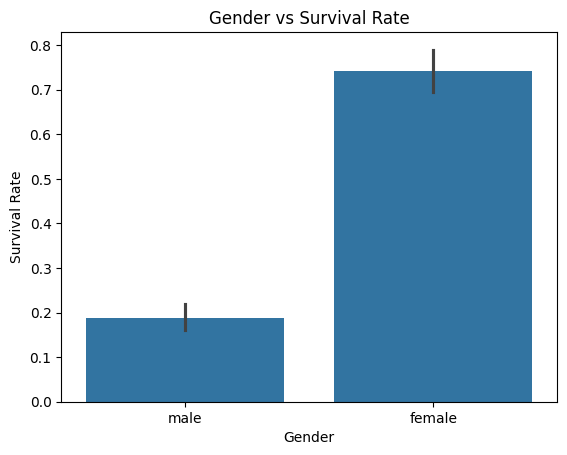

In [528]:
# Compare survival rate between male and female
sns.barplot(x='Sex', y='Survived', data=df, estimator=np.mean)
plt.title("Gender vs Survival Rate")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()

This is we se again **bar chart** shows that females survived much more than males.

**Heatmap – Correlation between Numeric Features**

**Heatmap**

**Definition**:
A heatmap is a colored grid that shows the relationship (correlation) between numeric values.

**Purpose**:
Used to see which features are related (positively or negatively).

**What it shows**:
Strong relationships appear in dark colors, weak ones in light colors.
👉 Example: Higher Fare ↔ Higher Survival, Higher Class ↔ Higher Fare.

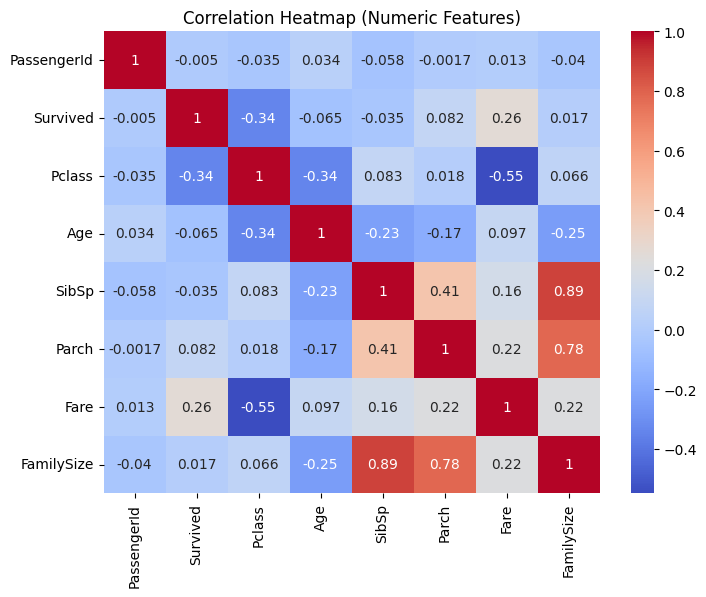

In [529]:
# Check correlation among numeric columns
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

**Boxplot**

**Definition**:
A boxplot shows the spread and outliers of numerical data (like range, median, quartiles).

**Purpose**:
It helps to detect outliers and understand how values are distributed.

**What it shows**:
The box shows the middle 50% of data, and dots outside are outliers.
👉 Example: Compare fare distribution between survivors and non-survivors.

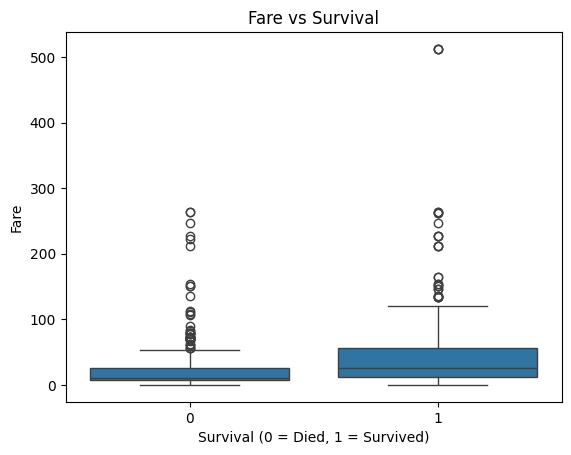

In [530]:
# Show fare range for survived vs not survived passengers
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare vs Survival")
plt.xlabel("Survival (0 = Died, 1 = Survived)")
plt.ylabel("Fare")
plt.show()

**Summary**:
People who paid higher fares usually had better survival chances,
because they were in 1st or 2nd class, close to lifeboats.

**Histogram – Age Distribution by Survival**

**Definition**:
A histogram shows the frequency distribution of a numerical column (like Age).

**Purpose**:
It helps us see how values are spread — which ranges are most common.

**What it shows**:
The bars show how many people fall into each range.
Example: Check which age groups had more survivors.

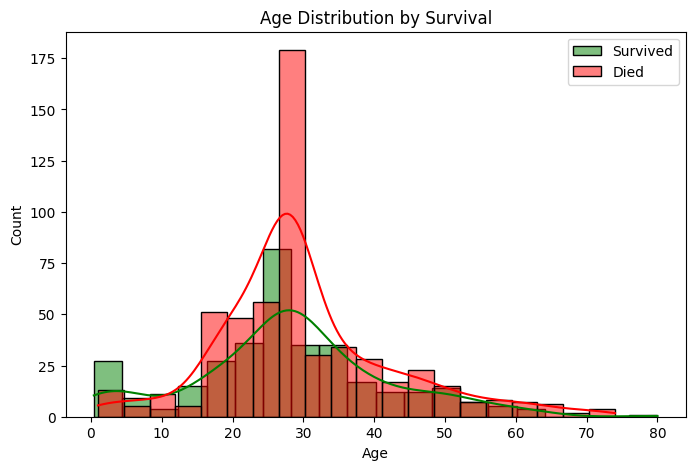

In [531]:
# Compare age distribution for survived vs died passengers
plt.figure(figsize=(8,5))
sns.histplot(df[df['Survived']==1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived']==0]['Age'], bins=20, kde=True, color='red', label='Died')
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.legend()
plt.show()

**Summary**:
Most survivors were young adults and children,
while middle-aged and older passengers had lower survival rates.

**Pie Chart  Passenger Class Percentage**

**Pie Chart**

**Definition**:
A pie chart divides a circle into slices to show proportion or percentage of categories.

**Purpose**:
Used to visualize composition — how much each category contributes to the total.

**What it shows**:
Each slice represents a class or group’s share in the dataset.
 Example: Show percentage of passengers in 1st, 2nd, and 3rd class.

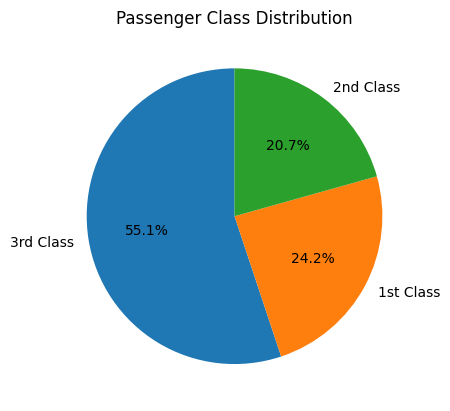

In [532]:
# Show how many passengers were in each class
class_counts = df['Pclass'].value_counts()
plt.pie(class_counts, labels=['3rd Class', '1st Class', '2nd Class'], autopct='%1.1f%%', startangle=90)
plt.title("Passenger Class Distribution")
plt.show()

**Summary**:
Most passengers were from 3rd class, followed by 1st and 2nd class.
This explains why the overall survival rate was low —
3rd-class passengers had the least access to rescue boats.

# Prepare Data for Machine Learning

In [533]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   891 non-null    int64   
 1   Survived      891 non-null    int64   
 2   Pclass        891 non-null    int64   
 3   Name          891 non-null    object  
 4   Sex           891 non-null    object  
 5   Age           891 non-null    float64 
 6   SibSp         891 non-null    int64   
 7   Parch         891 non-null    int64   
 8   Ticket        891 non-null    object  
 9   Fare          891 non-null    float64 
 10  Embarked      891 non-null    object  
 11  AgeGroup      891 non-null    object  
 12  FamilySize    891 non-null    int64   
 13  FareGroup     891 non-null    category
 14  Alone         891 non-null    object  
 15  CabinSection  891 non-null    object  
 16  Title         891 non-null    object  
 17  TicketPrefix  891 non-null    object  
dtypes: categor

In [534]:
# Remove useless columns (like Name, Ticket etc.)
df_ml = df.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [535]:
# Convert categorical columns into numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_cols = ['Sex', 'Embarked', 'AgeGroup', 'Alone', 'CabinSection', 'Title', 'TicketPrefix', 'FareGroup']
le = LabelEncoder()

for col in label_cols:
    df_ml[col] = le.fit_transform(df_ml[col])


In [536]:
df_ml.dtypes

,0
Survived,int64
Pclass,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,int64
AgeGroup,int64
FamilySize,int64


**Summary**:
We removed unnecessary text columns and converted all categorical columns into numeric codes.
Now every column in the dataset is numeric and ready for machine learning models.

In [537]:
# Check final shape and a few rows that my data is ready for ML or not
df_ml.shape


(891, 15)

In [538]:
df_ml.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySize,FareGroup,Alone,CabinSection,Title,TicketPrefix
0,0,3,1,22.0,1,0,7.2500,2,1,2,1,1,8,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,2,3,1,2,3,4
2,1,3,0,26.0,0,0,7.9250,2,1,1,2,0,8,1,5
3,1,1,0,35.0,1,0,53.1000,2,1,2,3,1,2,3,2
4,0,3,1,35.0,0,0,8.0500,2,1,1,2,0,8,2,2


# **Predict Survival**
**Goal**:
To build a model that can predict whether a passenger survived based on their details
(like age, class, gender, fare, and family info).

**This is a classification problem, not a regression**.?

**Reason**
we target column is survived which has the value:

1 → Passenger survived

0 → Passenger did not survive

That is, the output is categorical (two classes),

so you have a binary classification problem, not a regression.

# Train Data for Machine Learning
**Definition**:
Before applying any ML algorithm, data must be divided into:

X → input features (Passenger info)

y → target label (Survived)

**Purpose**:
To give the model data to learn from (X → y relation).

In [539]:
# Features (input) and Target (output)
X = df_ml.drop('Survived', axis=1)
y = df_ml['Survived']

In [540]:
# Split data into training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [541]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (712, 14)
y_train shape: (712,)


So Now We separated the dataset into input (X) and output (y) and split it for model training and testing.

# **Implementation Machine Learning with (Classification Models)**

**Definition**:
Machine Learning models help us predict the survival of passengers.
Since “Survived” has 2 classes (0 = Died, 1 = Survived), this is a Binary Classification Problem.

**Model-1-Logistic Regression**

**Definition**:
Logistic Regression is a simple algorithm used for binary classification.

**Purpose**:
To predict the probability of survival (0 or 1).

**Rule**:
It uses a sigmoid function to map predicted values between 0 and 1.

In [542]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report


In [543]:
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Why does this warning appear?**

"Convergence Warning: lbfgs failed to converge (status = 1)"

**Meaning**:
Logistic regression for model training does not complete its internal optimization steps —
because your dataset is too large or off-scale, and is not being solved in the default 100-200 iterations.

**Logistic Regression (with Scaling)**

In [544]:
# Scale numeric data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**What is Feature Scaling (Standardization)**?

**Definition**:
Scaling means adjusting numeric data so all columns have similar ranges —
for example, Age (0-80) and Fare (0-500) are converted into a standard range.

**Purpose**:
Without scaling, large numbers (like Fare) can dominate small ones (like Parch).
Scaling helps the algorithm treat all features equally and improves model stability and speed.

In [545]:
# Train Logistic Regression model
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=500)

In [546]:
#Predict results
y_pred_log = log_model.predict(X_test_scaled)

In [547]:
# ✅ Step 5: Evaluate performance
print( classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("MSE:", mean_squared_error(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Accuracy: 0.8212290502793296
MSE: 0.1787709497206704


The model correctly predicted around 82% of all passengers.
It did a very good job identifying people who died,
and a fairly good job predicting those who survived.

The low MSE (0.17) means the model’s predictions are very close to the actual truth —
that’s a sign of a well-performing, balanced model.

**summary**:
Logistic Regression gave an accuracy of 82% after scaling the data.
It performed strongly in identifying both survivors and non-survivors.
The model is stable, interpretable, and reliable for Titanic survival prediction.

**Model-2-Random Forest Classifier**

**Definition**:
Random Forest is an ensemble model — it combines many decision trees.

**Purpose**:
To improve accuracy and reduce overfitting by averaging multiple tree predictions.

**Rule**:
Each tree votes, and the majority decides the final output.

In [548]:
from sklearn.ensemble import RandomForestClassifier

In [549]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [550]:
print("🔹 Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

🔹 Random Forest Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179

Accuracy: 0.8324022346368715
MSE: 0.16759776536312848


*Random Forest* predicted survival with 83% accuracy, which is slightly higher than Logistic Regression (82%).
It performed really well in detecting passengers who died (recall = 0.88),
and also predicted survivors quite accurately.
The low MSE (0.16) means the model’s predictions were close to real outcomes.

**Summary** :

Random Forest gave the best performance among all models so far.
With 83% accuracy and low error, it’s reliable for Titanic survival prediction.
It balances bias and variance better than single models like Logistic Regression or Decision Tree.

Model 3:**Support Vector Machine (SVM)**

**Definition**:
SVM finds the best decision boundary (hyperplane) that separates two classes.

**Purpose**:
To create a clear line between survivors and non-survivors.

**Rule**:
It maximizes the margin between the two groups.

In [551]:
from sklearn.svm import SVC

In [552]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [553]:
print("🔹 SVM Report:\n", classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("MSE:", mean_squared_error(y_test, y_pred_svm))

🔹 SVM Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77       105
           1       0.77      0.27      0.40        74

    accuracy                           0.66       179
   macro avg       0.71      0.61      0.58       179
weighted avg       0.70      0.66      0.62       179

Accuracy: 0.664804469273743
MSE: 0.33519553072625696


The **SVM** model correctly predicted about 66% of the passengers.
It was very good at identifying people who died (recall = 0.94),
but it missed many survivors (recall = 0.27) — meaning it struggled to detect survivors accurately.
The MSE = 0.33 shows higher error compared to other models.

**Summary**:

The SVM model gave moderate accuracy (66%) but failed to balance both classes properly.
It predicted “died” cases well but could not correctly identify most survivors.
Compared to Logistic Regression (82%) and Random Forest (83%),
SVM performed the weakest on the Titanic dataset.

**Model 4: Decision Tree Classifier**

**Definition**:
Decision Tree divides data into branches based on feature values.

**Purpose**:
To create human-like decision logic for predicting survival.

**Rule**:
Splits dataset by asking questions like “Is Age < 15?” → yes/no → next split.

In [554]:
from sklearn.tree import DecisionTreeClassifier

In [555]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [556]:
print("🔹 Decision Tree Report:\n", classification_report(y_test, y_pred_tree))
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))

🔹 Decision Tree Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

Accuracy: 0.776536312849162
MSE: 0.22346368715083798


**Interpretation**:

The Decision Tree model correctly predicted around 78% of passengers.
It performed fairly well on both classes — people who died (recall = 0.79) and those who survived (recall = 0.76).
The MSE = 0.22 shows a moderate error, meaning predictions are fairly close to actual results.

 **Summary**:

The Decision Tree gave good overall accuracy (78%) and balanced performance between both classes.
It’s easy to interpret and visualize but slightly less stable than Random Forest.
Compared to other models, it performed better than SVM, but below Logistic Regression (82%) and Random Forest (83%) in accuracy.

# Compare All Model Results

In [557]:
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'Decision Tree': accuracy_score(y_test, y_pred_tree)
}

print("📊 Model Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.3f}")


📊 Model Accuracy Comparison:
Logistic Regression: 0.821
Random Forest: 0.832
SVM: 0.665
Decision Tree: 0.777


***Interpretation***:

Here’s the performance comparison of all four models based on accuracy:

Random Forest (83.2%) → Highest accuracy, best overall model.

Logistic Regression (82.1%) → Very close second, simple and reliable.

Decision Tree (77.7%) → Decent performance but slightly less stable.

SVM (66.5%) → Lowest accuracy, not suitable for this dataset.

**Summary**:
Among all algorithms, Random Forest performed the best with 83% accuracy,
followed closely by Logistic Regression (82%).
Decision Tree gave average performance, while SVM performed poorly.
Overall, the Random Forest model is the most accurate and balanced choice for predicting Titanic survival.